In [ ]:
# Table of Contents

# 01. Introductions
# 02. K-Means Clustering
# 03. DBSCAN Clustering
# 04. Hierarchical Clustering

In [1]:
# 01. Introductions
# Clustering is an unsupervised learning method which can be used to discover the underlying pattern in the data structure.  
# For example, it can be used to group unlabelled data

(10000, 12)


,ID,Nationality,Gender,Age,Degree,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter
0,1,India,0,25,BS,14,2,14,6,43.67,51.73,F
1,2,India,0,24,BS,14,2,14,6,62.01,72.23,C
2,3,India,0,26,BS,14,2,14,6,45.03,54.37,F
3,4,India,0,21,BS,14,2,14,6,48.86,57.68,F
4,5,France,1,23,BS,14,2,2,7,80.37,88.41,A
5,6,Spain,1,18,PHD,12,1,7,4,89.29,89.70,A
6,7,India,1,22,MS,13,0,13,3,76.64,80.27,B
7,8,India,1,19,MS,13,0,13,3,89.34,86.90,B
8,9,India,1,25,MS,13,0,13,3,81.73,78.61,C
9,10,India,1,18,MS,13,0,13,3,75.28,80.79,B


ColumnName, DataType, MissingValues
ID , int64 , False
Nationality , object , False
Gender , int64 , False
Age , int64 , False
Degree , object , False
Hours on Readings , int64 , False
Hours on Assignments , int64 , False
Hours on Games , int64 , False
Hours on Internet , int64 , False
Exam , float64 , False
Grade , float64 , False
GradeLetter , object , False
Column Datatypes:
 Nationality              object
Gender                    int64
Age                       int64
Degree                   object
Hours on Readings         int64
Hours on Assignments      int64
Hours on Games            int64
Hours on Internet         int64
Exam                    float64
GradeLetter              object
dtype: object


C:\Users\Yong\AppData\Local\Temp\ipykernel_8224\3754135475.py:32: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('ID',1)
C:\Users\Yong\AppData\Local\Temp\ipykernel_8224\3754135475.py:33: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('Grade',1)


'Data Example:'

,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,GradeLetter,Degree_ BS,Degree_ MS,Degree_ PHD,Nationality_ China,Nationality_ France,Nationality_ India,Nationality_ Spain
0,0,25,14,2,14,6,43.67,F,1,0,0,0,0,1,0
1,0,24,14,2,14,6,62.01,C,1,0,0,0,0,1,0
2,0,26,14,2,14,6,45.03,F,1,0,0,0,0,1,0
3,0,21,14,2,14,6,48.86,F,1,0,0,0,0,1,0
4,1,23,14,2,2,7,80.37,A,1,0,0,0,1,0,0
5,1,18,12,1,7,4,89.29,A,0,0,1,0,0,0,1
6,1,22,13,0,13,3,76.64,B,0,1,0,0,0,1,0
7,1,19,13,0,13,3,89.34,B,0,1,0,0,0,1,0
8,1,25,13,0,13,3,81.73,C,0,1,0,0,0,1,0
9,1,18,13,0,13,3,75.28,B,0,1,0,0,0,1,0


Index(['Gender', 'Age', 'Hours on Readings', 'Hours on Assignments',
       'Hours on Games', 'Hours on Internet', 'Exam', 'GradeLetter',
       'Degree_ BS', 'Degree_ MS', 'Degree_ PHD', 'Nationality_ China',
       'Nationality_ France', 'Nationality_ India', 'Nationality_ Spain'],
      dtype='object')


'Data snapshot: '

,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,GradeLetter,Degree_ MS,Degree_ PHD,Nationality_ France,Nationality_ India,Nationality_ Spain
0,0.0,0.875,1.000000,0.142857,1.000000,0.428571,0.060854,F,0.0,0.0,0.0,1.0,0.0
1,0.0,0.750,1.000000,0.142857,1.000000,0.428571,0.366622,C,0.0,0.0,0.0,1.0,0.0
2,0.0,1.000,1.000000,0.142857,1.000000,0.428571,0.083528,F,0.0,0.0,0.0,1.0,0.0
3,0.0,0.375,1.000000,0.142857,1.000000,0.428571,0.147382,F,0.0,0.0,0.0,1.0,0.0
4,1.0,0.625,1.000000,0.142857,0.142857,0.500000,0.672724,A,0.0,0.0,1.0,0.0,0.0
5,1.0,0.000,0.857143,0.071429,0.500000,0.285714,0.821440,A,0.0,1.0,0.0,0.0,1.0
6,1.0,0.500,0.928571,0.000000,0.928571,0.214286,0.610537,B,1.0,0.0,0.0,1.0,0.0
7,1.0,0.125,0.928571,0.000000,0.928571,0.214286,0.822274,B,1.0,0.0,0.0,1.0,0.0
8,1.0,0.875,0.928571,0.000000,0.928571,0.214286,0.695398,C,1.0,0.0,0.0,1.0,0.0
9,1.0,0.000,0.928571,0.000000,0.928571,0.214286,0.587863,B,1.0,0.0,0.0,1.0,0.0


[3 2 3 ... 0 0 0]


,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Degree_ MS,Degree_ PHD,Nationality_ France,Nationality_ India,Nationality_ Spain
0,0.0,0.875,1.000000,0.142857,1.000000,0.428571,0.060854,0.0,0.0,0.0,1.0,0.0
1,0.0,0.750,1.000000,0.142857,1.000000,0.428571,0.366622,0.0,0.0,0.0,1.0,0.0
2,0.0,1.000,1.000000,0.142857,1.000000,0.428571,0.083528,0.0,0.0,0.0,1.0,0.0
3,0.0,0.375,1.000000,0.142857,1.000000,0.428571,0.147382,0.0,0.0,0.0,1.0,0.0
4,1.0,0.625,1.000000,0.142857,0.142857,0.500000,0.672724,0.0,0.0,1.0,0.0,0.0
5,1.0,0.000,0.857143,0.071429,0.500000,0.285714,0.821440,0.0,1.0,0.0,0.0,1.0
6,1.0,0.500,0.928571,0.000000,0.928571,0.214286,0.610537,1.0,0.0,0.0,1.0,0.0
7,1.0,0.125,0.928571,0.000000,0.928571,0.214286,0.822274,1.0,0.0,0.0,1.0,0.0
8,1.0,0.875,0.928571,0.000000,0.928571,0.214286,0.695398,1.0,0.0,0.0,1.0,0.0
9,1.0,0.000,0.928571,0.000000,0.928571,0.214286,0.587863,1.0,0.0,0.0,1.0,0.0


'Data:'

,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,GradeLetter,Degree_ MS,Degree_ PHD,Nationality_ France,Nationality_ India,Nationality_ Spain,Cluster
9990,0.0,0.250,0.928571,0.642857,0.642857,0.0,0.947316,0,0.0,1.0,1.0,0.0,0.0,1
9991,0.0,0.000,0.928571,0.642857,0.642857,0.0,0.994665,0,0.0,1.0,1.0,0.0,0.0,1
9992,0.0,0.750,0.928571,0.642857,0.642857,0.0,0.864121,0,0.0,1.0,1.0,0.0,0.0,1
9993,0.0,0.000,0.928571,0.642857,0.642857,0.0,0.846782,0,0.0,1.0,1.0,0.0,0.0,1
9994,0.0,0.250,0.928571,0.642857,0.642857,0.0,0.922307,0,0.0,1.0,1.0,0.0,0.0,1
9995,0.0,0.250,0.928571,0.642857,0.642857,0.0,0.997999,0,0.0,1.0,1.0,0.0,0.0,1
9996,0.0,0.750,0.928571,0.642857,0.642857,0.0,0.974158,0,0.0,1.0,1.0,0.0,0.0,1
9997,0.0,1.000,0.928571,0.642857,0.642857,0.0,0.848283,0,0.0,1.0,1.0,0.0,0.0,1
9998,0.0,0.125,0.928571,0.642857,0.642857,0.0,0.946482,0,0.0,1.0,1.0,0.0,0.0,1
9999,0.0,0.000,0.928571,0.642857,0.642857,0.0,0.944315,0,0.0,1.0,1.0,0.0,0.0,1


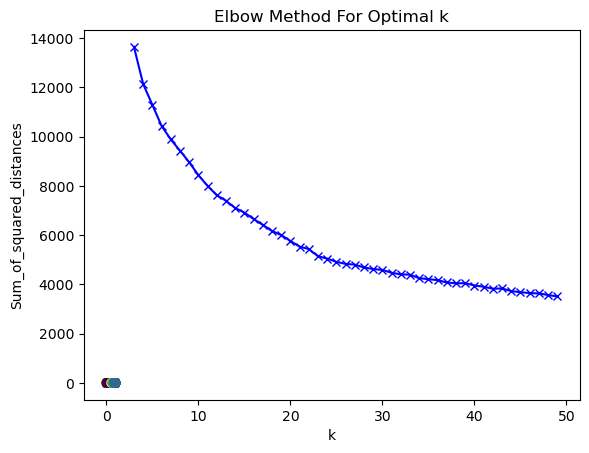

'Data:'

,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,GradeLetter,Degree_ MS,Degree_ PHD,Nationality_ France,Nationality_ India,Nationality_ Spain,Cluster
9990,0.0,0.250,0.928571,0.642857,0.642857,0.0,0.947316,0,0.0,1.0,1.0,0.0,0.0,13
9991,0.0,0.000,0.928571,0.642857,0.642857,0.0,0.994665,0,0.0,1.0,1.0,0.0,0.0,13
9992,0.0,0.750,0.928571,0.642857,0.642857,0.0,0.864121,0,0.0,1.0,1.0,0.0,0.0,13
9993,0.0,0.000,0.928571,0.642857,0.642857,0.0,0.846782,0,0.0,1.0,1.0,0.0,0.0,13
9994,0.0,0.250,0.928571,0.642857,0.642857,0.0,0.922307,0,0.0,1.0,1.0,0.0,0.0,13
9995,0.0,0.250,0.928571,0.642857,0.642857,0.0,0.997999,0,0.0,1.0,1.0,0.0,0.0,13
9996,0.0,0.750,0.928571,0.642857,0.642857,0.0,0.974158,0,0.0,1.0,1.0,0.0,0.0,13
9997,0.0,1.000,0.928571,0.642857,0.642857,0.0,0.848283,0,0.0,1.0,1.0,0.0,0.0,13
9998,0.0,0.125,0.928571,0.642857,0.642857,0.0,0.946482,0,0.0,1.0,1.0,0.0,0.0,13
9999,0.0,0.000,0.928571,0.642857,0.642857,0.0,0.944315,0,0.0,1.0,1.0,0.0,0.0,13


In [49]:
# 02. K-Means Clustering #############################################
# Requirements: numerical and normalized features


import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML
from sklearn import preprocessing

df=pd.read_csv('data_students_10k.csv')
print(df.shape)
# strip column names
df=df.rename(columns=lambda x: x.strip())
cols=df.columns
# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))

# replace missing values in numerical variables by using mean value #################################
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Hours on Assignments"].fillna(df["Hours on Assignments"].mean(), inplace=True)
df["Hours on Games"].fillna(df["Hours on Games"].mean(), inplace=True)
df["Exam"].fillna(df["Exam"].mean(), inplace=True)
df["Grade"].fillna(df["Grade"].mean(), inplace=True)

# check again whether there are missing values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())
 
# remove column ID and grade which are not appropriate to be included in this classification task
df=df.drop('ID',1)
df=df.drop('Grade',1)

# Data preprocessing ################################################################################
print('Column Datatypes:\n',df.dtypes)

# convert all nominal variables to binary variables
df_raw=df.copy(deep=True) 
df_knn=df.copy(deep=True) 
# create new binary columns
df_dummies=pd.get_dummies(df_knn[['Degree','Nationality']])
# add them to dataframe
df_knn=df_knn.join(df_dummies)
# drop original columns
df_knn=df_knn.drop('Degree',axis=1)
df_knn=df_knn.drop('Nationality', axis=1)
display('Data Example:',HTML(df_knn.head(10).to_html()))

# drop extra binary columns, since we only need N-1 binary columns
print(df_knn.columns)
df_knn=df_knn.drop('Degree_ BS', axis=1)
df_knn=df_knn.drop('Nationality_ China', axis=1)

# Normalized all numerical features
# min-max normalization to scale [0, 1]
for col in df_knn.columns:
    if col != 'GradeLetter':
        # exclude GradeLetter, since it is label in our data
        df_knn[col]=(df_knn[col]-df_knn[col].min())/(df_knn[col].max()-df_knn[col].min())

display('Data snapshot: ',HTML(df_knn.head(10).to_html()))

# encode labels for classifications later

y = df_knn['GradeLetter'] # define label as nominal values
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y) # encode nominal labels to integers #####################################

print(y_encoded)

df_knn['GradeLetter'] = y_encoded


# We ignore the label column
df_kmeans=df_knn.drop('GradeLetter',axis=1)
display(HTML(df_kmeans.head(10).to_html()))

# KMeans clustering ####################################################################
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

# API, https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

kmeans=KMeans(n_clusters=4, random_state=1,max_iter=200)
kmeans.fit(df_kmeans)
y_pred=kmeans.predict(df_kmeans)

plt.scatter(df_kmeans['Exam'],df_kmeans['Age'],c=y_pred,cmap='viridis')

# get the cluster labels and add it back to the original data
opt=kmeans.labels_
df_knn['Cluster']=opt
display('Data:',HTML(df_knn.tail(10).to_html()))


# try different K value and find the best K for KMeans
# Assumption: SSE is smaller, it is better

Sum_of_squared_distances = []
K = range(3, 50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_kmeans)
    Sum_of_squared_distances.append(km.inertia_)
    
# Plot K and SSE, observe which one is better
# In the plot, the elbow on the arm is optimal k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

km = KMeans(n_clusters=20)
km = km.fit(df_kmeans)

opt=km.labels_
df_knn['Cluster']=opt
display('Data:',HTML(df_knn.tail(10).to_html()))

'Data:'

,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Degree_ MS,Degree_ PHD,Nationality_ France,Nationality_ India,Nationality_ Spain
9990,0.0,0.250,0.928571,0.642857,0.642857,0.0,0.947316,0.0,1.0,1.0,0.0,0.0
9991,0.0,0.000,0.928571,0.642857,0.642857,0.0,0.994665,0.0,1.0,1.0,0.0,0.0
9992,0.0,0.750,0.928571,0.642857,0.642857,0.0,0.864121,0.0,1.0,1.0,0.0,0.0
9993,0.0,0.000,0.928571,0.642857,0.642857,0.0,0.846782,0.0,1.0,1.0,0.0,0.0
9994,0.0,0.250,0.928571,0.642857,0.642857,0.0,0.922307,0.0,1.0,1.0,0.0,0.0
9995,0.0,0.250,0.928571,0.642857,0.642857,0.0,0.997999,0.0,1.0,1.0,0.0,0.0
9996,0.0,0.750,0.928571,0.642857,0.642857,0.0,0.974158,0.0,1.0,1.0,0.0,0.0
9997,0.0,1.000,0.928571,0.642857,0.642857,0.0,0.848283,0.0,1.0,1.0,0.0,0.0
9998,0.0,0.125,0.928571,0.642857,0.642857,0.0,0.946482,0.0,1.0,1.0,0.0,0.0
9999,0.0,0.000,0.928571,0.642857,0.642857,0.0,0.944315,0.0,1.0,1.0,0.0,0.0


Labels:  {0, 1, 2, 3, -1}


'Data after clustering:'

,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Degree_ MS,Degree_ PHD,Nationality_ France,Nationality_ India,Nationality_ Spain,Cluster
9990,0.0,0.250,0.928571,0.642857,0.642857,0.0,0.947316,0.0,1.0,1.0,0.0,0.0,-1
9991,0.0,0.000,0.928571,0.642857,0.642857,0.0,0.994665,0.0,1.0,1.0,0.0,0.0,-1
9992,0.0,0.750,0.928571,0.642857,0.642857,0.0,0.864121,0.0,1.0,1.0,0.0,0.0,-1
9993,0.0,0.000,0.928571,0.642857,0.642857,0.0,0.846782,0.0,1.0,1.0,0.0,0.0,-1
9994,0.0,0.250,0.928571,0.642857,0.642857,0.0,0.922307,0.0,1.0,1.0,0.0,0.0,-1
9995,0.0,0.250,0.928571,0.642857,0.642857,0.0,0.997999,0.0,1.0,1.0,0.0,0.0,-1
9996,0.0,0.750,0.928571,0.642857,0.642857,0.0,0.974158,0.0,1.0,1.0,0.0,0.0,-1
9997,0.0,1.000,0.928571,0.642857,0.642857,0.0,0.848283,0.0,1.0,1.0,0.0,0.0,-1
9998,0.0,0.125,0.928571,0.642857,0.642857,0.0,0.946482,0.0,1.0,1.0,0.0,0.0,-1
9999,0.0,0.000,0.928571,0.642857,0.642857,0.0,0.944315,0.0,1.0,1.0,0.0,0.0,-1


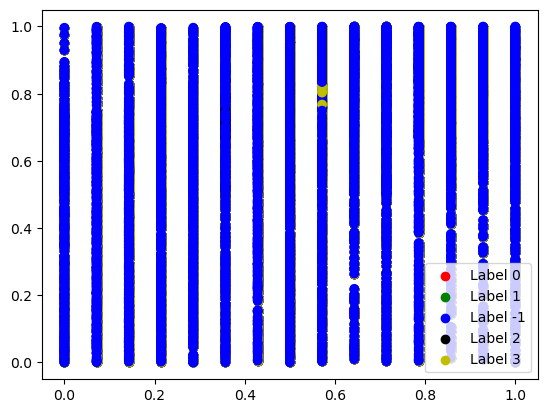

In [45]:
# 03. DBSCAN - Density-based Clustering

from sklearn.cluster import DBSCAN

# API: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
df_dbscan=df_knn.drop(['GradeLetter','Cluster'],axis=1)
display('Data:',HTML(df_dbscan.tail(10).to_html()))

# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.21, min_samples = 26).fit(df_dbscan) 
labels = db_default.labels_ 
labelsets = set(labels)
print('Labels: ', labelsets)
# add clutering results to the original dataframe
df_dbscan['Cluster']=labels
display('Data after clustering:',HTML(df_dbscan.tail(10).to_html()))

# Visualize the clusters

# Building the label to colour mapping 
# Need to figure out how many clusters were produced, then assign different number of the colors
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'k'
colours[3] = 'y'
colours[-1] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(df_dbscan['Hours on Readings'], df_dbscan['Exam'], color ='r'); 
g = plt.scatter(df_dbscan['Hours on Readings'], df_dbscan['Exam'], color ='g'); 
b = plt.scatter(df_dbscan['Hours on Readings'], df_dbscan['Exam'], color ='b');  
k = plt.scatter(df_dbscan['Hours on Readings'], df_dbscan['Exam'], color ='k');  
y = plt.scatter(df_dbscan['Hours on Readings'], df_dbscan['Exam'], color ='y'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
#plt.figure(figsize =(9, 9)) 
plt.scatter(df_dbscan['Hours on Readings'], df_dbscan['Exam'], c = cvec)   
# Building the legend 
plt.legend((r, g, b, k, y), ('Label 0', 'Label 1', 'Label -1', 'Label 2', 'Label 3'))   
plt.show()

'Data:'

,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Degree_ MS,Degree_ PHD,Nationality_ France,Nationality_ India,Nationality_ Spain
9990,0.0,0.250,0.928571,0.642857,0.642857,0.0,0.947316,0.0,1.0,1.0,0.0,0.0
9991,0.0,0.000,0.928571,0.642857,0.642857,0.0,0.994665,0.0,1.0,1.0,0.0,0.0
9992,0.0,0.750,0.928571,0.642857,0.642857,0.0,0.864121,0.0,1.0,1.0,0.0,0.0
9993,0.0,0.000,0.928571,0.642857,0.642857,0.0,0.846782,0.0,1.0,1.0,0.0,0.0
9994,0.0,0.250,0.928571,0.642857,0.642857,0.0,0.922307,0.0,1.0,1.0,0.0,0.0
9995,0.0,0.250,0.928571,0.642857,0.642857,0.0,0.997999,0.0,1.0,1.0,0.0,0.0
9996,0.0,0.750,0.928571,0.642857,0.642857,0.0,0.974158,0.0,1.0,1.0,0.0,0.0
9997,0.0,1.000,0.928571,0.642857,0.642857,0.0,0.848283,0.0,1.0,1.0,0.0,0.0
9998,0.0,0.125,0.928571,0.642857,0.642857,0.0,0.946482,0.0,1.0,1.0,0.0,0.0
9999,0.0,0.000,0.928571,0.642857,0.642857,0.0,0.944315,0.0,1.0,1.0,0.0,0.0


[0 0 0 ... 0 0 0]


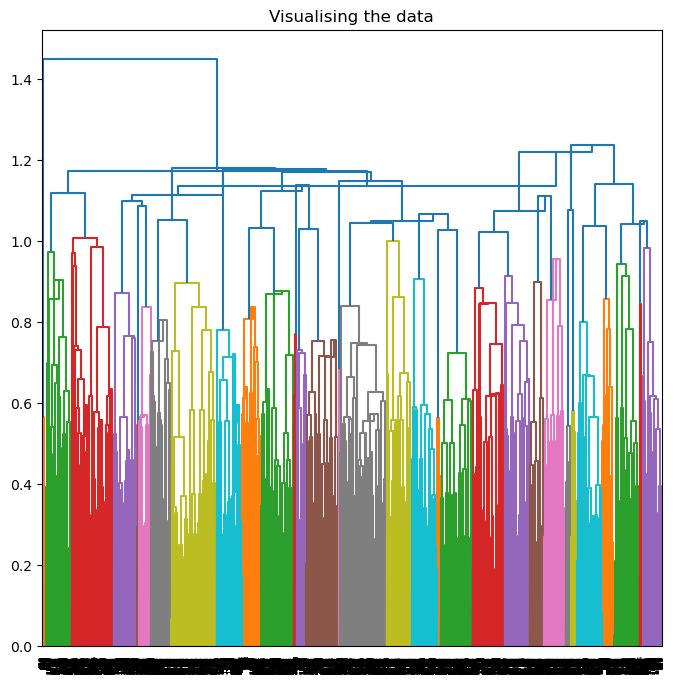

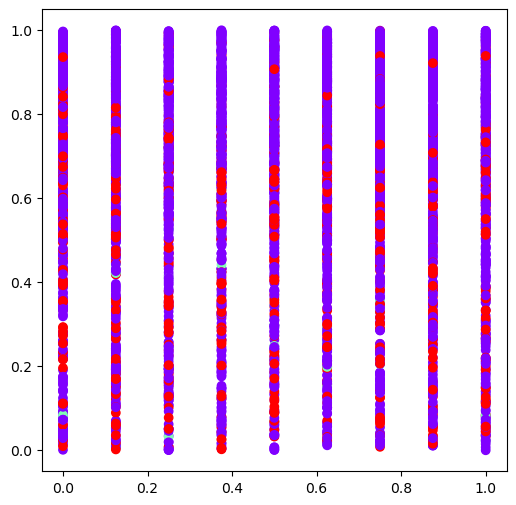

In [52]:
# 04. Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc 

# API, https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

df_hc=df_knn.drop(['GradeLetter','Cluster'],axis=1)
display('Data:',HTML(df_hc.tail(10).to_html()))

# the running time is long, we use the first 5000 rows for testing
df_hc = df_hc.head(5000)

# Plot Dendrogram
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(df_hc, method ='centroid'))) 

# Clustering based on the Dendrogram
# choose best K based on elbow method introduced above
cluster = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='single')
cls=cluster.fit_predict(df_hc)
print(cluster.labels_)

# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(df_hc['Age'], df_hc['Exam'],  
           c = cls, cmap ='rainbow') 
plt.show()